<a href="https://colab.research.google.com/github/vipul-bhardwaj/Capstone-Greatlearning/blob/main/CapstoneFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---



In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 4.1 MB/s 


In [ ]:
import pydicom as dcm

In [ ]:
# Imports
import cv2
import tqdm
import pylab as pl
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

import skimage
from skimage import feature, filters

import os
from os import listdir
from os.path import isfile, join
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pydicom as dcm
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from matplotlib.patches import Rectangle
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
import tensorflow
from tensorflow.keras.layers import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cwd_old = os.getcwd()
print('\nWorking Directory: ', cwd_old)

os.chdir('/content/drive/MyDrive/Colab Notebooks/Extracted_data')
print('Working directory has been changed')

cwd_new = os.getcwd()
print('\nCurrent Working Directory: ', cwd_new)


Working Directory:  /content
Working directory has been changed

Current Working Directory:  /content/drive/MyDrive/Colab Notebooks/Extracted_data


In [ ]:
#data_dir = os.path.join(cwd_new)
#train_images = os.path.join(data_dir + 'stage_2_train_images/')
#test_images = os.path.join(data_dir + 'stage_2_test_images/')
#output_dir = os.path.join(cwd_new + 'output/')

# No need to run these commands from now on as the directory has been created:
#if not os.path.exists(data_dir):
#  os.makedirs(data_dir)

#if not os.path.exists(train_images):
#  os.makedirs(train_images)

#if not os.path.exists(test_images):
#  os.makedirs(test_images)

#if not os.path.exists(output_dir):
#  os.makedirs(output_dir)

### Import Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_labels.csv')
print('First ten rows of Training set:\n', train_labels.head(10))

First ten rows of Training set:
                               patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
6  00569f44-917d-4c86-a842-81832af98c30    NaN    NaN    NaN     NaN       0
7  006cec2e-6ce2-4549-bffa-eadfcd1e9970    NaN    NaN    NaN     NaN       0
8  00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1
9  00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1


In [ ]:
print('The train_label dataframe has {} rows and {} columns.'.format(train_labels.shape[0], train_labels.shape[1]))

The train_label dataframe has 30227 rows and 6 columns.


In [ ]:
print('Number of unique patientId are: {}'.format(train_labels['patientId'].nunique()))

Number of unique patientId are: 26684


No of entries which has Pneumonia: 9555 i.e., 32.0%
No of entries which don't have Pneumonia: 20672 i.e., 68.0%


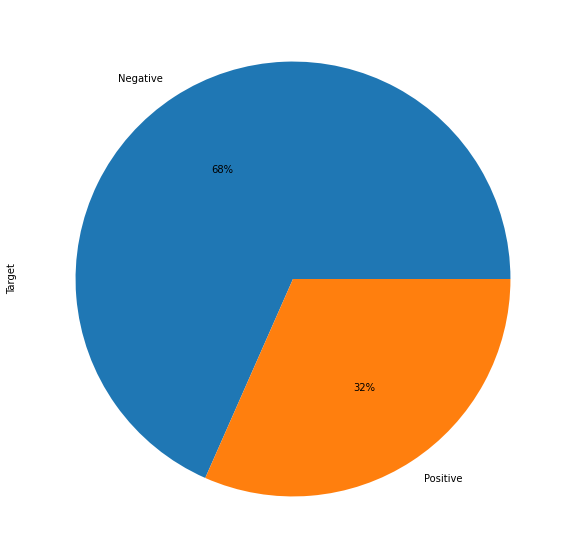

In [ ]:
print(f'No of entries which has Pneumonia: {train_labels[train_labels.Target == 1].shape[0]} i.e., {round(train_labels[train_labels.Target == 1].shape[0]/train_labels.shape[0]*100, 0)}%')
print(f'No of entries which don\'t have Pneumonia: {train_labels[train_labels.Target == 0].shape[0]} i.e., {round(train_labels[train_labels.Target == 0].shape[0]/train_labels.shape[0]*100, 0)}%')
_ = train_labels['Target'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Negative', 'Positive'], figsize = (10, 10))

We can see that out of 30227 enteries - 20672 don't have penumonia while the remaining 9555 have been tested postive for pneumonia

In [ ]:
print('Number of nulls in bounding box columns: {}'.format(train_labels[['x', 'y', 'width', 'height']].isnull().sum().to_dict()))
print('Checking value counts for the targets: {}'.format(train_labels['Target'].value_counts().to_dict()))

Number of nulls in bounding box columns: {'x': 20672, 'y': 20672, 'width': 20672, 'height': 20672}
Checking value counts for the targets: {0: 20672, 1: 9555}


In [ ]:
bounding_box = train_labels.groupby('patientId').size().to_frame('number_of_boxes').reset_index()
train_labels = train_labels.merge(bounding_box, on = 'patientId', how = 'left')
print('Number of patientIds per bounding box in the dataset: ')
(bounding_box.groupby('number_of_boxes').size().to_frame('number_of_patientId').reset_index().set_index('number_of_boxes').sort_values(by = 'number_of_boxes'))

Number of patientIds per bounding box in the dataset: 


,number_of_patientId
number_of_boxes,
1,23286
2,3266
3,119
4,13


In [ ]:
class_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_detailed_class_info.csv')
print('First five rows of Class label dataset are:\n', class_labels.head())

First five rows of Class label dataset are:
                               patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity


In [ ]:
id=class_labels['patientId'].to_list()

In [ ]:
id[5]

'00436515-870c-4b36-a041-de91049b9ab4'

In [ ]:
# Number of entries in class_label dataframe:
print('The class_label dataframe has {} rows and {} columns.'.format(class_labels.shape[0], class_labels.shape[1]))

The class_label dataframe has 30227 rows and 2 columns.


In [ ]:
def get_feature_distribution(data, feature):
  # Count for each label
  label_counts = data[feature].value_counts()
  # Count the number of items in each class
  total_samples = len(data)
  print("Feature: {}".format(feature))
  for i in range(len(label_counts)):
    label = label_counts.index[i]
    count = label_counts.values[i]
    percent = int((count / total_samples) * 10000) / 100
    print("{:<30s}: {} which is {}% of the total data in the dataset".format(label, count, percent))

In [ ]:
get_feature_distribution(class_labels, 'class')

Feature: class
No Lung Opacity / Not Normal  : 11821 which is 39.1% of the total data in the dataset
Lung Opacity                  : 9555 which is 31.61% of the total data in the dataset
Normal                        : 8851 which is 29.28% of the total data in the dataset


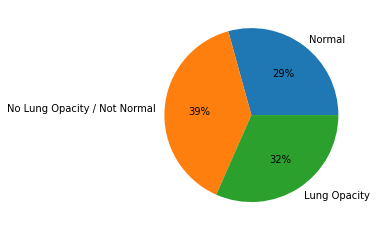

In [ ]:
figsize = (15, 12)
_ = class_labels['class'].value_counts().sort_index(ascending = False).plot(kind = 'pie', autopct = '%.0f%%').set_ylabel('')

In [ ]:
# Merging the two dataset - 'train_labels' and 'class_labels':
training_data_merged = pd.concat([train_labels, class_labels['class']], axis = 1)
print('After merging, the dataset looks like: \n')
training_data_merged.head()

After merging, the dataset looks like: 



,patientId,x,y,width,height,Target,number_of_boxes,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity


In [ ]:
print('After merge, the dataset has {} rows and {} columns.'.format(training_data_merged.shape[0], training_data_merged.shape[1]))

After merge, the dataset has 30227 rows and 8 columns.


Target Plot

Text(0.5, 1.0, 'Class and Target for Chest Exams')

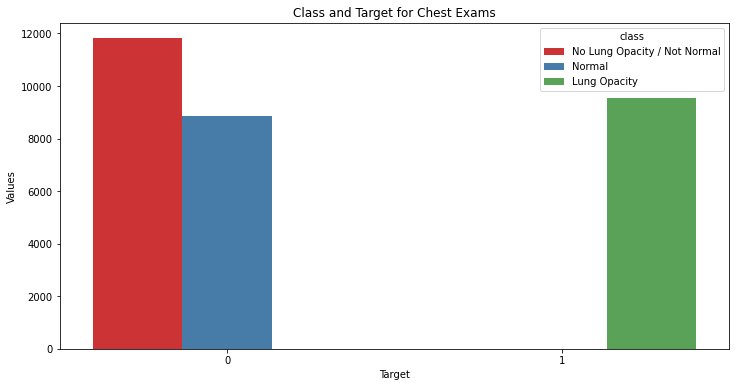

In [ ]:
fig, ax = plt.subplots(nrows = 1, figsize = (12, 6))
temp = training_data_merged.groupby('Target')['class'].value_counts()
data_target_class = pd.DataFrame(data = {'Values': temp.values}, index = temp.index).reset_index()
sns.barplot(ax = ax, x = 'Target', y = 'Values', hue = 'class', data = data_target_class, palette = 'Set1')
plt.title('Class and Target for Chest Exams')

Comparing the train labels and info labels dataset we can see that the Lung Opacity in info table is considered as Target = 1 in train label. This means that the class = No Lung Opacity/Not Normal is also treated as 0, increasing accuracy of our model since the No Lung Opacity/Not Normal IDs also have some white spots that could be misinterpreted as Pneumonia.

No of entries which has Pneumonia: 9555 i.e., 32.0%
No of entries which don't have Pneumonia: 20672 i.e., 68.0%


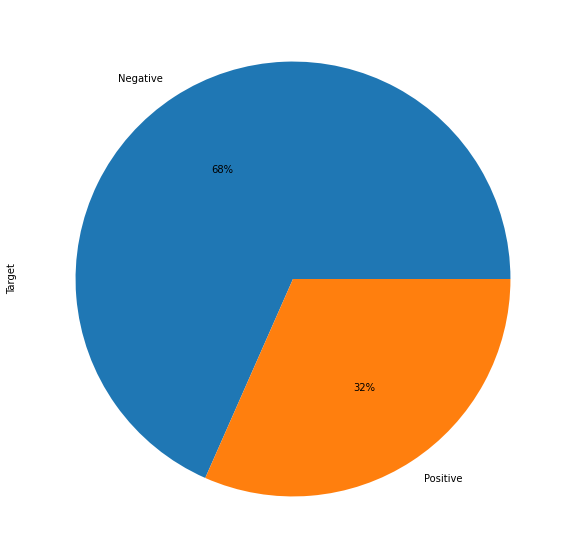

In [ ]:
print(f'No of entries which has Pneumonia: {train_labels[train_labels.Target == 1].shape[0]} i.e., {round(train_labels[train_labels.Target == 1].shape[0]/train_labels.shape[0]*100, 0)}%')
print(f'No of entries which don\'t have Pneumonia: {train_labels[train_labels.Target == 0].shape[0]} i.e., {round(train_labels[train_labels.Target == 0].shape[0]/train_labels.shape[0]*100, 0)}%')
_ = train_labels['Target'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Negative', 'Positive'], figsize = (10, 10))

This Pie chart represnets the above data with No lung opacity/normal and normal combined vs lung opacity cases.

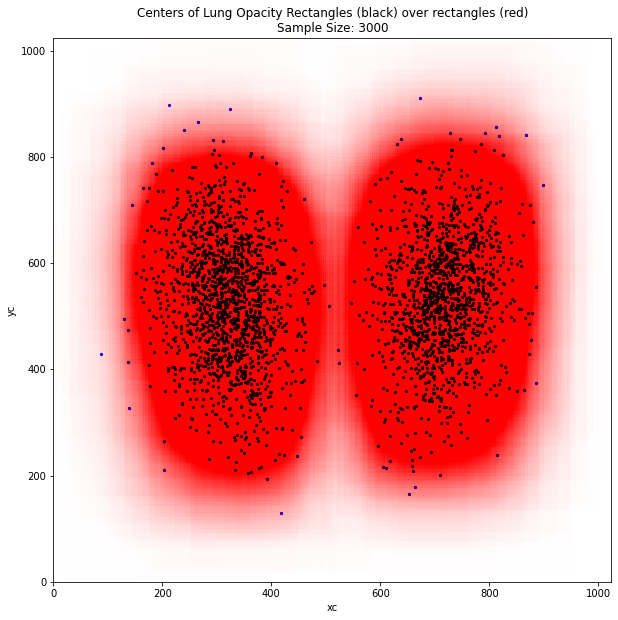

In [ ]:
# Bounding Box Distribution


fig, ax = plt.subplots(1, 1, figsize = (10, 10))
target_1 = training_data_merged[training_data_merged['Target'] == 1]
target_sample = target_1.sample(3000)
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2
plt.title('Centers of Lung Opacity Rectangles (black) over rectangles (red)\nSample Size: 3000')
target_sample.plot.scatter(x = 'xc', y = 'yc', xlim = (0, 1024), ylim = (0, 1024), ax = ax, alpha = 0.8, marker = '.', color = 'blue')

for i, crt_sample in target_sample.iterrows():
    ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
                width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color="red"))

In [ ]:
def distTab(df, clN=None, bins=None):
    
    ## When the input is a series or list
    if type(df)==pd.core.series.Series:
        
        tmpDf = pd.DataFrame(df.value_counts(bins=bins))
        tmpDf = pd.merge(tmpDf,
                         pd.DataFrame(round(df.value_counts(bins=bins, normalize=True)*100,1)),
                         on=tmpDf.index)
        
        tmpDf.columns = ["Value", "Frequency", "Percentage"]
    
    ## When the input is a DataFrame or list
    if type(df)==pd.core.frame.DataFrame:
        
        tmpDf = pd.DataFrame(df[clN].value_counts(bins=bins))
        tmpDf = pd.merge(tmpDf,
                         pd.DataFrame(round(df[clN].value_counts(bins=bins, normalize=True)*100,1)),
                         on=tmpDf.index)
        
        tmpDf.columns = [clN, "Frequency", "Percentage"]
        
    else:
        
        df = pd.Series(df)
        
        tmpDf = pd.DataFrame(df.value_counts(bins=bins))
        tmpDf = pd.merge(tmpDf,
                         pd.DataFrame(round(df.value_counts(bins=bins, normalize=True)*100,1)),
                         on=tmpDf.index)
        
        tmpDf.columns = ["Value", "Frequency", "Percentage"]
        
    return(tmpDf)

In [ ]:
def show_dicom_images(data, df, img_path):
  img_data = list(data.T.to_dict().values())
  f, ax = plt.subplots(5, 4, figsize = (16, 18))
  
  for i, row in enumerate(img_data):
    image = row['patientId'] + '.dcm'
    path = os.path.join(img_path, image)
    data = dcm.read_file(path)
    rows = df[df['patientId'] == row['patientId']]
    data_img = dcm.dcmread(path)
    ax[i//5, i%4].imshow(data_img.pixel_array, cmap = plt.cm.bone)
    ax[i//5, i%4].axis('off')
    box_data = list(rows.T.to_dict().values())
    
    for j, row in enumerate(box_data):
      ax[i//5, i%4].add_patch(Rectangle(xy = (row['x'], row['y']),
                                        width = row['width'], height = row['height'],
                                        color = 'blue', alpha = 0.15))
  plt.show()

In [ ]:
#show_dicom_images(data = training_data_merged.loc[(training_data_merged['Target'] == 0)].sample(20),
#df = training_data_merged, img_path = '/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_images/')

The above images represent no lung opacity / not normal / normal lung images. 
Thus the target = 0

In [ ]:
#show_dicom_images(data = training_data_merged.loc[(training_data_merged['Target'] == 1)].sample(20),
#df = training_data_merged, img_path = '/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_images/')

Here the target is 1 which represent lung opacity is present thus they are surrounded by bounding boxes.


In [ ]:
vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

In [ ]:
def process_dicom_data(data_df, data_path):
    for var in vars:
        data_df[var] = None
    image_names = data_df.patientId
    for i, img_name in tqdm_notebook(enumerate(image_names)):
        imagePath = basePth+data_path+img_name+".dcm"
        data_row_img_data = dcm.read_file(imagePath)
        idx = (data_df['patientId']==data_row_img_data.PatientID)
        data_df.loc[idx,'Modality'] = data_row_img_data.Modality
        data_df.loc[idx,'PatientAge'] = pd.to_numeric(data_row_img_data.PatientAge)
        data_df.loc[idx,'PatientSex'] = data_row_img_data.PatientSex
        data_df.loc[idx,'BodyPartExamined'] = data_row_img_data.BodyPartExamined
        data_df.loc[idx,'ViewPosition'] = data_row_img_data.ViewPosition
        data_df.loc[idx,'ConversionType'] = data_row_img_data.ConversionType
        data_df.loc[idx,'Rows'] = data_row_img_data.Rows
        data_df.loc[idx,'Columns'] = data_row_img_data.Columns  
        data_df.loc[idx,'PixelSpacing'] = str.format("{:4.3f}",data_row_img_data.PixelSpacing[0]) 

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
basePth = "/content/drive/MyDrive/Colab Notebooks/Extracted_data/"
trainXPth = basePth+ "stage_2_train_images/"
trainYPth = basePth

In [ ]:
def imgShape(dictX):
    imgShape = [[],[]]
    
    if type(dictX)==dict:
        for v in dictX.values():

            imgShape[0].append(v.shape[0])
            imgShape[1].append(v.shape[1])
    
    if type(dictX)==list:
        for v in dictX:

            imgShape[0].append(v.shape[0])
            imgShape[1].append(v.shape[1])

    # Creating dataframe
    imgShape = pd.DataFrame({

        'height': imgShape[0],
        'width': imgShape[0],

    })
    return(imgShape)

In [ ]:
# Preprocessing
def preProcessing(img, height, width):
    
    dim = (width, height)
    imgPro = copy.deepcopy(img)
    
    for i in img.keys():
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        blur = cv2.GaussianBlur(res, (5, 5), 0)
        imgPro[i] = blur
    
    return(imgPro)

In [ ]:
sampNum = 6000 # Number of samples to import
X = [] # Empty to read training images

print("Before sampling\n")
print("Total training unique patient ids: ",training_data_merged['patientId'].nunique())
print("Number of images in train set:", len(os.listdir(trainXPth)))
print("\n")
print("Total training labels {}" .format(training_data_merged.shape))
display(distTab(training_data_merged, "Target")) # Dsitribution of target before sampling

print("\n\nAfter sampling\n")
Y = training_data_merged.sample(n=sampNum, random_state=1) # Sampling
Y.reset_index(drop=True, inplace=True)
print("Total sampled training labels {}" .format(Y.shape))
display(distTab(Y.sample(n=sampNum), "Target"))  # Dsitribution of target after sampling


for indx in Y.patientId:
    
    try:
        
        X.append(dcm.read_file(trainXPth+indx+'.dcm'))
        
    except:
        
        continue
        

X = dict(zip([x.PatientID for x in X], [x.pixel_array for x in X])) # Dictionary for training images for patient id's
print("\n\nTotal sampled training images {}" .format(len(X)))

Y = Y[Y.patientId.isin(X.keys())]
print("Total training labels {}" .format(Y.shape))

Before sampling

Total training unique patient ids:  26684
Number of images in train set: 26684


Total training labels (30227, 8)


,Target,Frequency,Percentage
0,0,20672,68.4
1,1,9555,31.6




After sampling

Total sampled training labels (6000, 8)


,Target,Frequency,Percentage
0,0,4113,68.6
1,1,1887,31.4




Total sampled training images 5848
Total training labels (6000, 8)


In [ ]:
type(X)

dict

In [ ]:
type(Y)

pandas.core.frame.DataFrame

In [ ]:
imgShape(X).describe()

,height,width
count,5848.0,5848.0
mean,1024.0,1024.0
std,0.0,0.0
min,1024.0,1024.0
25%,1024.0,1024.0
50%,1024.0,1024.0
75%,1024.0,1024.0
max,1024.0,1024.0


In [ ]:
training_data_merged.groupby('Target')['class'].value_counts()

Target  class                       
0       No Lung Opacity / Not Normal    11821
        Normal                           8851
1       Lung Opacity                     9555
Name: class, dtype: int64

In [ ]:
process_dicom_data(Y,'stage_2_train_images/')

0it [00:00, ?it/s]

In [ ]:
type(Y)

pandas.core.frame.DataFrame

In [ ]:
Y.head()

,patientId,x,y,width,height,Target,number_of_boxes,class,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing


In [ ]:
Y_positives=Y.dropna(inplace=False)

In [ ]:
Y_positives.describe()

In [ ]:
Y_positives.head()

In [ ]:
Y_positives1=Y_positives.copy(deep=True)

In [ ]:
Y_positives["ViewPosition"].value_counts()

In [ ]:
Y_positives["ConversionType"].value_counts()

In [ ]:
Y_positives["Modality"].value_counts()

Modality, ViewPosition,ConverstionType and BodyPartExamined all are all colunns have just one type of value so they can be dropped for correlation analysis as well as during modelling.

In [ ]:
Y_positives1.drop(columns=["class","patientId","Modality","BodyPartExamined","ViewPosition","ConversionType"], inplace=True)

In [ ]:
Y_positives1.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
Y_positives1.info()

In [ ]:
Y_positives1["PatientAge"]=Y_positives1["PatientAge"].astype('int64')

In [ ]:
Y_positives1["Rows"]=Y_positives1["Rows"].astype('int64')
Y_positives1["Columns"]=Y_positives1["Columns"].astype('int64')

In [ ]:
Y_positives1["PixelSpacing"]=Y_positives1["PixelSpacing"].astype('float64')

In [ ]:
Y_positives1['PatientSex'] = le.fit_transform(Y_positives1['PatientSex'])

In [ ]:
Y_positives1.info()

In [ ]:
Y_positives1.head()

In [ ]:
Y_positives1.isnull().any()

In [ ]:
corr0=Y_positives1.corr(method="spearman")

In [ ]:
corr0

In [ ]:
corr=Y_positives1.corr()

In [ ]:
corr

In [ ]:
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr, annot = True)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(Y_positives.corr(), annot=True,linewidth=0.5,ax=ax)

NO definite strong corrleation btween various fields. Also, this methods of calculating correlation doesn't help in for categorical variables.

In [ ]:
dcm.read_file(basePth+"stage_2_train_images/"+Y.patientId[0]+".dcm")

In [ ]:
distTab(Y, 'Modality')

In [ ]:
## Examining the PatientAge
display(distTab(Y, 'PatientAge', bins=10))

34% of the patients examined were in the age range of 47-62, 26% of the patients were in the age range of 31 to 47

There were 5 errors with patients of the age > 100

## Conclusion from EDA

After exploring the data, both the tabular and DICOM data, we were able to:

- discover duplications in the tabular data
- explore the DICOM images
- extract meta information from the DICOM data
- add features to the tabular data from the meta information in DICOM data
- further analyze the distribution of the data with the newly added features from DICOM metadata

==============================================================

In [ ]:
dcm.read_file(basePth+"stage_2_train_images/"+Y.patientId[0]+".dcm")

In [ ]:
#To read meta data
patientId = S_Training_data_merged['patientId'][0]
dcm_file = '/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_images/%s.dcm' % patientId
dcm_data = dcm.read_file(dcm_file)
print(dcm_data)

==============================================================

In [ ]:
import pickle

In [ ]:
#try:
    handle = open('/content/drive/MyDrive/Colab Notebooks/Extracted_data/Sample/S_trainingImages', 'wb')
    pickle.dump(S_trainingImages, handle)
     
#except:
    print("Something went wrong")

IndentationError: ignored

In [ ]:
#handle.close()

In [ ]:
#S_Training_data_merged.to_csv('/content/drive/MyDrive/Colab Notebooks/Extracted_data/Sample/S_Training_data_merged.csv')

=============================================================

In [ ]:
with open(r"/content/drive/MyDrive/Colab Notebooks/Extracted_data/Sample/S_trainingImages", "rb") as input_file:
  S_trainingImages1 = pickle.load(input_file)

In [ ]:
S1_Training_data_merged=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Extracted_data/Sample/S_Training_data_merged.csv")

In [ ]:
type(S_trainingImages1)

dict

In [ ]:
j=0

In [ ]:
for key in S_trainingImages1:
  if j!=5:
    print(key)
    print(S_trainingImages1[key])
    j=j+1
  else:
    j=0
    break
  

In [ ]:
j

5

====================================================================

# Modelling

# LENET

In [ ]:
# Creating a dataset of class of pneumonia patient & performing data augmentaion 
from sklearn.model_selection import train_test_split
import pydicom as dcm
import os
import cv2
import gc
import glob
from tqdm import tqdm
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
# Transfer learning with MOBILENET 


In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/AIML/Capstone Project/capstone/DATASET/stage_2_train_labels.csv')
details = pd.read_csv('/content/drive/MyDrive/AIML/Capstone Project/capstone/DATASET/stage_2_detailed_class_info.csv')

In [ ]:
# duplicates in details just have the same class so can be safely dropped
details = details.drop_duplicates('patientId').reset_index(drop=True)
labels_w_class = labels.merge(details, how='inner', on='patientId')

In [ ]:
labels_w_class.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [ ]:
labels_w_class.info()
# No null values in patientId ,Target and Class


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
# null values in x, y, width, height indicates that there is no pneumonia. Replacing null with 0
labels_w_class.fillna(0, inplace=True)
labels_w_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          30227 non-null  float64
 2   y          30227 non-null  float64
 3   width      30227 non-null  float64
 4   height     30227 non-null  float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
new_df = labels_w_class.head(6000)
new_df.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [ ]:
class_train, class_val = train_test_split(new_df, test_size=0.20, random_state=42, stratify=new_df['class'])

In [ ]:
IMAGE_SIZE = 1024
ADJUSTED_IMAGE_SIZE=224
ADJUSTED_IMAGE_SIZE_le=32
MASK_IMAGE_SIZE = 28
FACTOR = MASK_IMAGE_SIZE/IMAGE_SIZE

In [ ]:
X_feature_tr = []
y_feature_target_tr = []
y_feature_coordinates_tr = []
from PIL import Image
train_images_dir = '/content/drive/MyDrive/AIML/Capstone Project/capstone/DATASET/stage_2_train_images/'
def create_mask(datafm):
    X = []
    y=[]
    masks = np.zeros((int(datafm.shape[0]), MASK_IMAGE_SIZE, MASK_IMAGE_SIZE))
    for index, patient_id in enumerate(datafm['patientId'].T.to_dict().values()):
        image_path = train_images_dir+patient_id+".dcm"
        img = dcm.read_file(image_path)
        img = img.pixel_array
        img = cv2.resize(img, (ADJUSTED_IMAGE_SIZE, ADJUSTED_IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
        img = Image.fromarray(img)
        img = img.convert('RGB')
        img = preprocess_input(np.array(img, dtype=np.float32))
        X.append(img)
        rows = labels_w_class[labels_w_class['patientId']==patient_id]
        y.append(rows['Target'].values[0])

        row_data = list(rows.T.to_dict().values())
        for row in row_data:
            x1 = int(row['x']*FACTOR)
            x2 = int((row['x']*FACTOR)+(row['width']*FACTOR))
            y1 = int(row['y']*FACTOR)
            y2 = int((row['y']*FACTOR)+(row['height']*FACTOR))
            masks[index][y1:y2, x1:x2] = 1
    del img,row,row_data
    gc.collect()
    X=np.array(X)
    y=np.array(y)
    return X, y, masks

In [ ]:
X_train, y_tr_target, y_train = create_mask(class_train)
X_val, y_val_target, y_val = create_mask(class_val)

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, Conv2D, Reshape, UpSampling2D
from tensorflow.keras.models import Model, load_model
import tensorflow as tf
from tensorflow import keras

In [ ]:
def create_model(trainable=True):
    model_restransfer = MobileNet(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

    for layer in model_restransfer.layers:
        layer.trainable = trainable

    block1 = model_restransfer.get_layer("conv_pw_5_relu").output
    block2 = model_restransfer.get_layer("conv_pw_11_relu").output
    block3 = model_restransfer.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((28, 28))(x)

    return Model(inputs=model_restransfer.input, outputs=x)

In [ ]:
model_Mobilenet_transfer = create_model(False)
model_Mobilenet_transfer.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
_____________________________

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(4800, 224, 224, 3)
(4800, 28, 28)
(1200, 224, 224, 3)
(1200, 28, 28)


In [ ]:
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))


def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

model_Mobilenet_transfer.compile(optimizer='adam',
              loss=iou_bce_loss,
              metrics=['accuracy', mean_iou])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, 
                             save_best_only=True, save_weights_only=True)

stop = EarlyStopping(monitor="val_loss", patience=5)

In [ ]:
import tensorflow as tf
history_1 = model_Mobilenet_transfer.fit(X_train, y_train, validation_data = (X_val, y_val), 
          epochs=50, batch_size=10, verbose=1, callbacks=[checkpoint, stop])

Epoch 1/50
480/480 [==============================] - 252s 520ms/step - loss: 0.4638 - accuracy: 0.0060 - mean_iou: 0.2874 - val_loss: 0.4271 - val_accuracy: 0.0047 - val_mean_iou: 0.3503

Epoch 00001: val_loss improved from inf to 0.42714, saving model to model-0.43.h5
Epoch 2/50
480/480 [==============================] - 250s 522ms/step - loss: 0.4257 - accuracy: 0.0043 - mean_iou: 0.3507 - val_loss: 0.4311 - val_accuracy: 0.0045 - val_mean_iou: 0.3616

Epoch 00002: val_loss did not improve from 0.42714
Epoch 3/50
480/480 [==============================] - 250s 521ms/step - loss: 0.4154 - accuracy: 0.0047 - mean_iou: 0.3691 - val_loss: 0.4166 - val_accuracy: 0.0045 - val_mean_iou: 0.3727

Epoch 00003: val_loss improved from 0.42714 to 0.41660, saving model to model-0.42.h5
Epoch 4/50
480/480 [==============================] - 249s 519ms/step - loss: 0.4127 - accuracy: 0.0049 - mean_iou: 0.3727 - val_loss: 0.4122 - val_accuracy: 0.0047 - val_mean_iou: 0.3707

Epoch 00004: val_loss imp

150/150 [==============================] - 187s 1s/step - loss: 0.3889 - accuracy: 0.0057 - mean_iou: 0.4104
[0.3889171779155731, 0.00569940498098731, 0.4103507101535797]
38/38 [==============================] - 47s 1s/step - loss: 0.4021 - accuracy: 0.0057 - mean_iou: 0.3867
[0.40213271975517273, 0.005684523843228817, 0.3866516947746277]


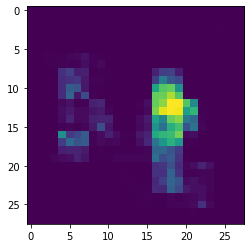

In [ ]:
mask_predicated =model_Mobilenet_transfer.predict(X_val)
print(model_Mobilenet_transfer.evaluate(X_train, y_train)) 

print(model_Mobilenet_transfer.evaluate(X_val, y_val)) 
plt.imshow(mask_predicated[1])


In [ ]:
# Le-Net model 

In [ ]:
class_train1, class_val1 = train_test_split(new_df, test_size=0.30, random_state=42, stratify=new_df['class'])

In [ ]:
X_feature_le = []
y_feature_target_le = []
y_feature_coordinates_le = []
from PIL import Image
train_images_dir = '/content/drive/MyDrive/AIML/Capstone Project/capstone/DATASET/stage_2_train_images/'
def create_mask_le(datafm):
    X = []
    y=[]
    masks = np.zeros((int(datafm.shape[0]), MASK_IMAGE_SIZE, MASK_IMAGE_SIZE))
    for index, patient_id in enumerate(datafm['patientId'].T.to_dict().values()):
        image_path = train_images_dir+patient_id+".dcm"
        img = dcm.read_file(image_path)
        img = img.pixel_array
        img = cv2.resize(img, (ADJUSTED_IMAGE_SIZE_le, ADJUSTED_IMAGE_SIZE_le), interpolation=cv2.INTER_NEAREST)
        img = Image.fromarray(img)
        img = img.convert('RGB2GRAY')
        img = preprocess_input(np.array(img, dtype=np.float32))
        X.append(img)
        rows = labels_w_class[labels_w_class['patientId']==patient_id]
        y.append(rows['Target'].values[0])

        row_data = list(rows.T.to_dict().values())
        for row in row_data:
            x1 = int(row['x']*FACTOR)
            x2 = int((row['x']*FACTOR)+(row['width']*FACTOR))
            y1 = int(row['y']*FACTOR) 
            masks[index][y1:y2, x1:x2] = 1
    del img,row,row_data
    gc.collect()
    X=np.array(X)
    y=np.array(y)
    return X, y, masks

In [ ]:
X_train_le, y_tr_target_le, y_train_le = create_mask_le(class_train1)
X_val_le, y_val_target_le, y_val_le = create_mask_le(class_val1)

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils import data
from pydicom import dcmread
from PIL import Image

In [ ]:
print(X_train_le.shape)
print(y_train_le.shape)
print(X_val_le.shape)
print(y_val_le.shape)

(4200, 32, 32, 3)
(4200, 28, 28)
(1800, 32, 32, 3)
(1800, 28, 28)


Decoding operations in each layer
First Layer: Convolutional Layer (CONV1):

Parameters: Input (N) = 28, Padding (P) = 2, Filter (F) = 5 x 5, Stride (S) = 1
Conv Operation: ((N + 2P - F) / S) + 1 = ((28 + 4 - 5) / 1) + 1 = 28 x 28
We will apply 6 filters / kernels so we will get a 28 x 28 x 6 dimensional output

Second Layer: Average Pooling Layer (POOL1):

Parameters: Input (N) = 28, Filter (F) = 2 x 2, Stride (S) = 2
AVG Pooling Operation: ((N + 2P -F) / S) + 1 = ((28 - 2) / 2) + 1 = 14 x 14
We will have a 14 x 14 x 6 dimensional output at the end of this pooling

Third Layer: Convolutional Layer (CONV2):

Parameters: Input (N) = 14, Filter (F) = 5 x 5, Stride (S) = 1
Conv Operation: ((N + 2P - F) / S) + 1 = ((14 - 5) / 1) + 1 = 10 x 10
We will apply 16 filters / kernels so we will get a 10 x 10 x 16 dimensional output

Fourth Layer: Average Pooling Layer (POOL2):

Parameters: Input (N) = 10, Filter (F) = 2 x 2, Stride (S) = 2
AVG Pooling Operation: ((N + 2P -F) / S) + 1 = ((10 - 2) / 2) + 1 = 5 x 5
We will have a 5 x 5 x 16 dimensional output at the end of this pooling

Fifth Layer: Fully Connected layer(FC1):

Parameters: W: 400 * 120, b: 120
We will have an output of 120 x 1 dimension

Sixth Layer: Fully Connected layer(FC2):

Parameters: W: 120 * 84, b: 84
We will have an output of 84 x 1 dimension

Seventh Layer: Output layer(Softmax):

Parameters: W: 84 * 2 , b: 2
We will get an output of 2 x 1 dimension

In [ ]:
model_lenet = Sequential()
model_lenet.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_lenet.add(MaxPool2D(strides=2))
model_lenet.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model_lenet.add(MaxPool2D(strides=2))
model_lenet.add(Flatten())
model_lenet.add(Dense(256, activation='relu'))
model_lenet.add(Dense(84, activation='relu'))
model_lenet.add(Dense(10, activation='softmax'))


In [ ]:
model_lenet.build()
model_lenet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [ ]:
model_lenet.compile(optimizer='adam',
              loss=iou_bce_loss,
              metrics=['accuracy', mean_iou])

In [ ]:
history_le = model_lenet.fit(X_train_le, y_train_le, validation_data = (X_val_le, y_val_le), 
          epochs=50, batch_size=10, verbose=1, callbacks=[checkpoint, stop])

In [ ]:
# Learning Curve VS Epoch Curve 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(list(range(1,21)))
plt.ylim([0, 1])
plt.legend(loc='lower right')

# U-NET

In [ ]:
import csv

# empty dictionary
pneumonia_locations = {}
# load table
with open(os.path.join('/content/drive/MyDrive/Pneumonia Detection/stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [ ]:
# load and shuffle filenames
folder = '/content/drive/MyDrive/Pneumonia Detection/stage_2_train_images'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 2560
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

n train samples 24124
n valid samples 2560


In [ ]:
import pydicom

class generator(keras.utils.Sequence):
    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [ ]:
def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
# define iou or jaccard loss function
def iou_loss(y_true, y_pred):
    y_true = tensorflow.cast(y_true, tensorflow.float32)
    y_pred = tensorflow.cast(y_pred, tensorflow.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

# create network and compiler
model = create_network(input_size=128, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam',
              loss=iou_bce_loss,
              metrics=['accuracy', mean_iou])

# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.001
    epochs = 5
    return lr*(np.cos(np.pi*x/epochs)+1.)/2
learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 128, 128, 32) 288         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_42 (BatchNo (None, 128, 128, 32) 128         conv2d_44[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_42 (LeakyReLU)      (None, 128, 128, 32) 0           batch_normalization_42[0][0]     
____________________________________________________________________________________________

In [ ]:
# create train and validation generators
folder = '/content/drive/MyDrive/Pneumonia Detection/stage_2_train_images'
train_gen = generator(folder, train_filenames[0:500], pneumonia_locations, batch_size=16, image_size=128, shuffle=True, augment=True, predict=False)
valid_gen = generator(folder, valid_filenames[0:100], pneumonia_locations, batch_size=16, image_size=128, shuffle=False, predict=False)

history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=5, workers=4, use_multiprocessing=True)


Epoch 1/5
31/31 [==============================] - 113s 3s/step - loss: 0.6225 - accuracy: 0.9433 - mean_iou: 0.6664 - val_loss: 0.7312 - val_accuracy: 0.6788 - val_mean_iou: 0.0370
Epoch 2/5
31/31 [==============================] - 114s 3s/step - loss: 0.5162 - accuracy: 0.9675 - mean_iou: 0.7072 - val_loss: 0.5330 - val_accuracy: 0.9669 - val_mean_iou: 0.6854
Epoch 3/5
31/31 [==============================] - 114s 3s/step - loss: 0.5289 - accuracy: 0.9664 - mean_iou: 0.6622 - val_loss: 0.5253 - val_accuracy: 0.9789 - val_mean_iou: 0.5570
Epoch 4/5
31/31 [==============================] - 103s 3s/step - loss: 0.5109 - accuracy: 0.9678 - mean_iou: 0.6952 - val_loss: 0.5140 - val_accuracy: 0.9764 - val_mean_iou: 0.7365
Epoch 5/5
31/31 [==============================] - 105s 3s/step - loss: 0.4935 - accuracy: 0.9654 - mean_iou: 0.7057 - val_loss: 0.5105 - val_accuracy: 0.9622 - val_mean_iou: 0.6514


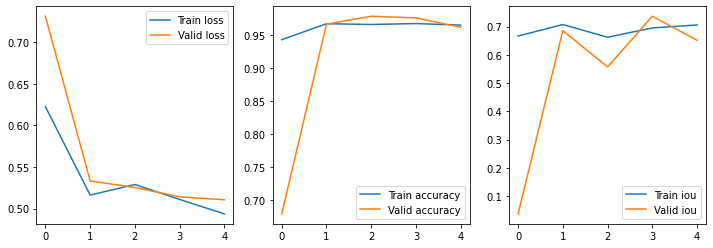

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

# Resnet

In [ ]:
detailclassinfo_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_detailed_class_info.csv')
trainlabels_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_labels.csv')

In [ ]:
merge_train_df = trainlabels_df.merge(detailclassinfo_df, left_on='patientId', right_on='patientId', how='inner')

In [ ]:
merge_train_df.sample(1)

,patientId,x,y,width,height,Target,class
36980,245d1104-6524-4d44-ace9-e54f0645a46e,532.0,568.0,148.0,210.0,1,Lung Opacity


In [ ]:
merge_train_df = merge_train_df. drop_duplicates()
merge_train_df.shape

(30227, 7)

In [ ]:
merge_train_df.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [ ]:
patientId = trainlabels_df['patientId'][0]
dcm_file = '/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_images/%s.dcm' % patientId
dcm_data = dcm.read_file(dcm_file)
print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [ ]:
im = dcm_data.pixel_array
print(type(im))
print(im.dtype)
print(im.shape)

<class 'numpy.ndarray'>
uint8
(1024, 1024)


Now we shall parse the data as shown below. The code is taken from stackoverflow.

In [ ]:
def parse_data(df):
    """
    Method to read a CSV file (Pandas dataframe) and parse the 
    data into the following nested dictionary:

      parsed = {
        
        'patientId-00': {
            'dicom': path/to/dicom/file,
            'label': either 0 or 1 for normal or pnuemonia, 
            'boxes': list of box(es)
        },
        'patientId-01': {
            'dicom': path/to/dicom/file,
            'label': either 0 or 1 for normal or pnuemonia, 
            'boxes': list of box(es)
        }, ...

      }

    """
    # --- Define lambda to extract coords in list [y, x, height, width]
    extract_box = lambda row: [row['y'], row['x'], row['height'], row['width']]

    parsed = {}
    for n, row in df.iterrows():
        # --- Initialize patient entry into parsed 
        pid = row['patientId']
        if pid not in parsed:
            parsed[pid] = {
                'dicom': '/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_images/%s.dcm' % pid,
                'label': row['Target'],
                'boxes': []}

        # --- Add box if opacity is present
        if parsed[pid]['label'] == 1:
            parsed[pid]['boxes'].append(extract_box(row))

    return parsed

parsed = parse_data(trainlabels_df)

def draw(data):
    """
    Method to draw single patient with bounding box(es) if present 

    """
    # --- Open DICOM file
    d = dcm.read_file(data['dicom'])
    im = d.pixel_array

    # --- Convert from single-channel grayscale to 3-channel RGB
    im = np.stack([im] * 3, axis=2)

    # --- Add boxes with random color if present
    for box in data['boxes']:
        #rgb = np.floor(np.random.rand(3) * 256).astype('int')
        rgb = [0, 0, 255] # Just use blue
        im = overlay_box(im=im, box=box, rgb=rgb, stroke=15)

    plt.imshow(im, cmap=plt.cm.gist_gray)
    plt.axis('off')

def overlay_box(im, box, rgb, stroke=2):
    """
    Method to overlay single box on image

    """
    # --- Convert coordinates to integers
    box = [int(b) for b in box]
    
    # --- Extract coordinates
    y1, x1, height, width = box
    y2 = y1 + height
    x2 = x1 + width

    im[y1:y1 + stroke, x1:x2] = rgb
    im[y2:y2 + stroke, x1:x2] = rgb
    im[y1:y2, x1:x1 + stroke] = rgb
    im[y1:y2, x2:x2 + stroke] = rgb

    return im

In [ ]:
import csv

In [ ]:
opacity_locations = {}
# load table
with open(os.path.join('/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        lungopacity = rows[5]
        # if row contains lungopacity add label to dictionary
        # which contains a list of lungopacity locations per filename
        if lungopacity == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save lungopacity location in dictionary
            if filename in opacity_locations:
                opacity_locations[filename].append(location)
            else:
                opacity_locations[filename] = [location]

In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_images'
filenames = os.listdir(folder)
print('Number of Train images:', len(filenames))
print('First 5 samples: \n')
filenames[0:5]

Number of Train images: 26684
First 5 samples: 



['f79e5a75-5e15-431a-9ba3-de64c1724b65.dcm',
 'f79fa94e-8886-425c-95d4-81abfea92aee.dcm',
 'f79fc759-fde0-4e2e-8951-26ac8af5ef89.dcm',
 'f7a169e2-a1a7-439a-ab83-0d34cf5ae4b9.dcm',
 'f7a172fc-a34f-4155-806d-7b0afe2a6156.dcm']

In [ ]:
import random

In [ ]:
random.shuffle(filenames)
n_valid_samples = 5336
n_train_samples = len(filenames) - n_valid_samples
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('Total file samples:', len(filenames))
print('Train samples (80%):', len(train_filenames))
print('Valid samples (20%):', len(valid_filenames))

Total file samples: 26684
Train samples (80%): 21348
Valid samples (20%): 5336


In [ ]:
class generatortransfer(tf.keras.utils.Sequence):
    
    def __init__(self, folder, filenames, opacity_locations=None, batch_size=32, image_size=320, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.opacity_locations = opacity_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = dcm.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains lung opacity
        if filename in opacity_locations:
            # loop through opacity
            for location in opacity_locations[filename]:
                # add 1's at the location of the lung opacity
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # resize both image and mask
        #img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # add trailing channel dimension
        msk = np.expand_dims(msk, -1)
         #Converting Image from GrayScale to RGB 
        if len(img.shape) != 3 or img.shape[2] != 3:
            img = np.stack((img,) * 3, -1)
            img = cv2.resize(img, dsize=(self.image_size, self.image_size), interpolation=cv2.INTER_CUBIC)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = dcm.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        #img = resize(img, (self.image_size, self.image_size), mode='reflect')
        #Converting Image from GrayScale to RGB 
        if len(img.shape) != 3 or img.shape[2] != 3:
          img = np.stack((img,) * 3, -1)
          img = cv2.resize(img, dsize=(self.image_size, self.image_size), interpolation=cv2.INTER_CUBIC)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [ ]:
class_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_detailed_class_info.csv')
print('First five rows of Class label dataset are:\n', class_labels.head())

First five rows of Class label dataset are:
                               patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity


In [ ]:
opacity = class_labels \
    .loc[class_labels['class'] == 'Lung Opacity'] \
    .reset_index()

In [ ]:
not_normal = class_labels \
    .loc[class_labels['class'] == 'No Lung Opacity / Not Normal'] \
    .reset_index()

In [ ]:
normal = class_labels \
    .loc[class_labels['class'] == 'Normal'] \
    .reset_index()

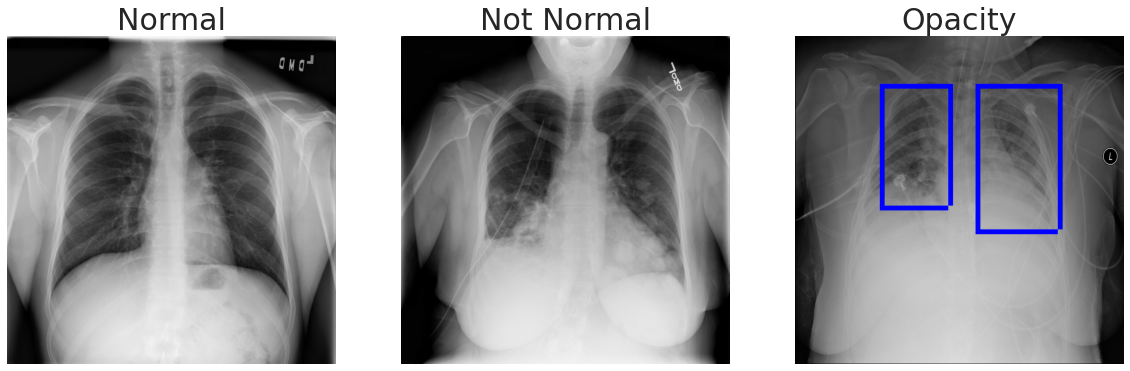

In [ ]:
fig=plt.figure(figsize=(20, 10))
columns = 3; rows = 1
fig.add_subplot(rows, columns, 1).set_title("Normal", fontsize=30)
draw(parsed[normal['patientId'].unique()[0]])
fig.add_subplot(rows, columns, 2).set_title("Not Normal", fontsize=30)
# ax2.set_title("Not Normal", fontsize=30)
draw(parsed[not_normal['patientId'].unique()[0]])
fig.add_subplot(rows, columns, 3).set_title("Opacity", fontsize=30)
# ax3.set_title("Opacity", fontsize=30)
draw(parsed[opacity['patientId'].unique()[0]])

In [ ]:
img_width = 128
img_height = 128
IMAGE_SIZE=128
kernel =3
num_of_classes =2
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE=1000
#input_shape = (img_width, img_height, 3)

In [ ]:
# create training and validation data
folder = '/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_images'
train_trans = generatortransfer(folder, train_filenames, opacity_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=True, augment=False, predict=False)
valid_trans = generatortransfer(folder, valid_filenames, opacity_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=False, predict=False)
#train_downsamples = generatortransfer(folder, tune_train_samples, opacity_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=False, predict=False)

In [ ]:
import keras
from tensorflow.keras import Sequential, backend as K
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Concatenate, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(ResNet50(input_shape= (img_width, img_height, 3), include_top=False, weights='imagenet'))
model.add(Dense(1024, activation='relu'))
model.add(UpSampling2D())
model.add(Dense(512, activation='relu'))
model.add(UpSampling2D())
model.add(Dense(256, activation='relu'))
model.add(UpSampling2D())
model.add(Dense(64, activation='relu'))
model.add(UpSampling2D())
model.add(Dense(8, activation='relu'))
model.add(UpSampling2D())
model.add(Dense(1, activation='sigmoid'))
# Say not to train first layer (ResNet) model. It is already trained
model.layers[0].trainable = False
print(model.summary())

94781440/94765736 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 4, 4, 1024)        2098176   
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 1024)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 8, 8, 512)         524800    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 512)       0         
_________________________________________________________________
dense_5 (Dense)              (None, 16, 16, 256)       131328    
_________________________________________________________

In [ ]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from skimage.transform import resize

In [ ]:
history = model.fit(train_trans, epochs=5, steps_per_epoch =10, shuffle=True)

Epoch 1/5
10/10 [==============================] - 113s 11s/step - loss: 0.7422 - accuracy: 0.8352
Epoch 2/5
10/10 [==============================] - 109s 11s/step - loss: 0.6863 - accuracy: 0.9879
Epoch 3/5
10/10 [==============================] - 108s 11s/step - loss: 0.6817 - accuracy: 0.9792
Epoch 4/5
10/10 [==============================] - 110s 11s/step - loss: 0.6769 - accuracy: 0.9830
Epoch 5/5
10/10 [==============================] - 107s 11s/step - loss: 0.6724 - accuracy: 0.9805


<Figure size 2160x1440 with 0 Axes>

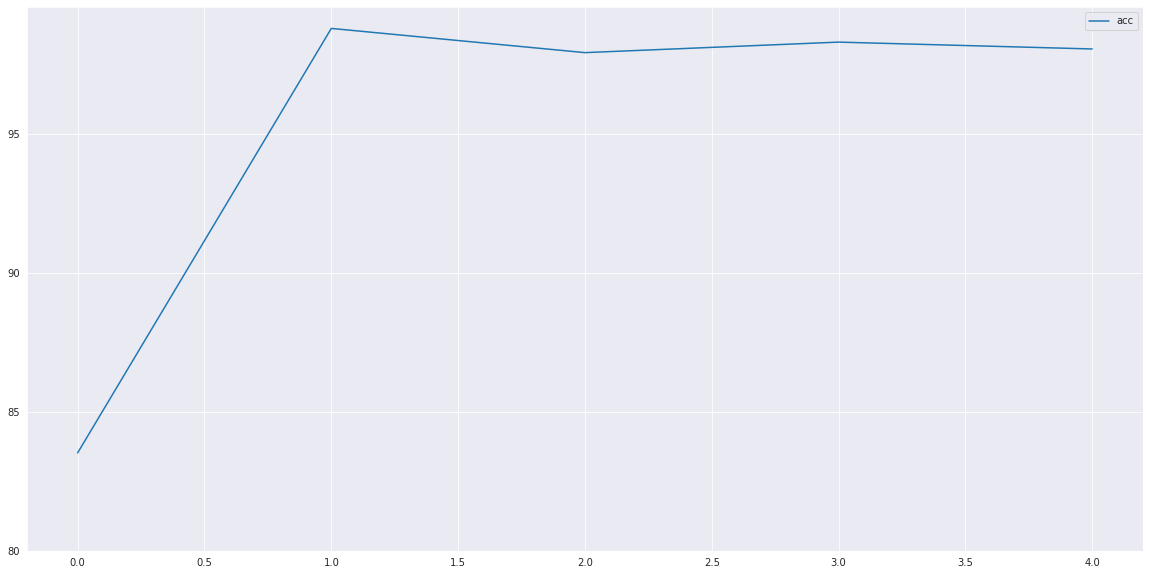

In [ ]:
# Plot Accuracy
plt.figure(figsize=(30,20))
#val_acc=np.asarray(model.history.history['val_accuracy'])*100
acc=np.asarray(model.history.history['accuracy'])*100
acc=pd.DataFrame({'acc':acc})
acc.plot(figsize=(20,10),yticks=range(80,100,5))

# VGG16

In [ ]:
import os,shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from skimage.transform import resize
import cv2
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Extracted_data')

['GCP Credits Request Link - RSNA.txt',
 'stage_2_detailed_class_info.csv',
 'stage_2_sample_submission.csv',
 'stage_2_test_images',
 'stage_2_train_images',
 'stage_2_train_labels.csv',
 'working',
 '.ipynb_checkpoints']

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_labels.csv')

In [ ]:
df['path']='/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_images/'+df['patientId'].astype(str)+'.dcm'

In [ ]:
df.head()

,patientId,x,y,width,height,Target,path
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,/content/drive/MyDrive/Colab Notebooks/Extract...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   path       30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
# basePth = "/content/drive/MyDrive/Colab Notebooks/Extracted_data/"
# trainXPth = basePth+ "stage_2_train_images/"
# trainYPth = basePth

In [ ]:
# sampNum = 6000 # Number of samples to import
# X = [] # Empty to read training images

# print("Before sampling\n")
# print("Total training unique patient ids: ",df['patientId'].nunique())
# print("Number of images in train set:", len(os.listdir(trainXPth)))
# print("\n")
# print("Total training labels {}" .format(df.shape))
# display(distTab(df, "Target")) # Dsitribution of target before sampling

# print("\n\nAfter sampling\n")
# Y = df.sample(n=sampNum, random_state=2) # Sampling
# Y.reset_index(drop=True, inplace=True)
# print("Total sampled training labels {}" .format(Y.shape))
# display(distTab(Y.sample(n=sampNum), "Target"))  # Dsitribution of target after sampling


#for indx in Y.patientId:
    
#    try:
        
#        X.append(dcm.read_file(trainXPth+indx+'.dcm'))
        
#    except:
        
#        continue
        

#X = dict(zip([x.PatientID for x in X], [x.pixel_array for x in X])) # Dictionary for training images for patient id's
#print("\n\nTotal sampled training images {}" .format(len(X)))

#Y = Y[Y.patientId.isin(X.keys())]
#print("Total training labels {}" .format(Y.shape))

Before sampling

Total training unique patient ids:  26684
Number of images in train set: 26684


Total training labels (30227, 7)


,Target,Frequency,Percentage
0,0,20672,68.4
1,1,9555,31.6




After sampling

Total sampled training labels (6000, 7)


,Target,Frequency,Percentage
0,0,4136,68.9
1,1,1864,31.1


In [ ]:
Y.head()

,patientId,x,y,width,height,Target,path
0,e4dd25aa-7839-4e0e-a984-c7cb1b31d2c7,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
1,5c389c6d-2abc-43a9-91e7-847f85bf6ff1,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
2,324f9ed1-09e0-483e-9bdd-d139e77acb85,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
3,4ac6590a-ecdb-47b7-92f3-cfc6fa405955,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
4,7213e146-4efd-40e6-ab88-a9e7a9c8c25c,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...


I have already saved the randomly generated subset in separate folder so I don't require to run the commented codes again. If they are required to be executed again, uncomment them.

In [ ]:
# negative=Y[Y['Target']==0]
# print(len(negative))
# negative.head()

4136


,patientId,x,y,width,height,Target,path
0,e4dd25aa-7839-4e0e-a984-c7cb1b31d2c7,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
1,5c389c6d-2abc-43a9-91e7-847f85bf6ff1,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
2,324f9ed1-09e0-483e-9bdd-d139e77acb85,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
3,4ac6590a-ecdb-47b7-92f3-cfc6fa405955,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...
4,7213e146-4efd-40e6-ab88-a9e7a9c8c25c,NaN,NaN,NaN,NaN,0,/content/drive/MyDrive/Colab Notebooks/Extract...


In [ ]:
# positive=Y[Y['Target']==1]
# unique_positive=positive[['path','patientId']]
# path=unique_positive['path'].unique()
# patientId=unique_positive['patientId'].unique()

In [ ]:
# unique_positive=pd.DataFrame({'path':path,'patientId':patientId})
# len(unique_positive)

1736

In [ ]:
# os.mkdir('/content/drive/MyDrive/Colab Notebooks/Extracted_data/working/data')

In [ ]:
#os.mkdir('/content/drive/MyDrive/Colab Notebooks/Extracted_data/working/data/positive')

In [ ]:
#os.mkdir('/content/drive/MyDrive/Colab Notebooks/Extracted_data/working/data/negative')

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Extracted_data/working')

In [ ]:
# for _,row in tqdm(unique_positive.iterrows()):
#     img=dcm.read_file(row['path']).pixel_array
#     img=resize(img,(256,256))
#     plt.imsave('data/positive/'+row['patientId']+'.jpg',img,cmap='gray')

1736it [11:57,  2.42it/s]


In [ ]:
# for _,row in tqdm(negative.iterrows()):
#     img=dicom.read_file(row['path']).pixel_array
#     img=resize(img,(256,256))
#     plt.imsave('data/negative/'+row['patientId']+'.jpg',img,cmap='gray')

4136it [33:11,  2.08it/s]


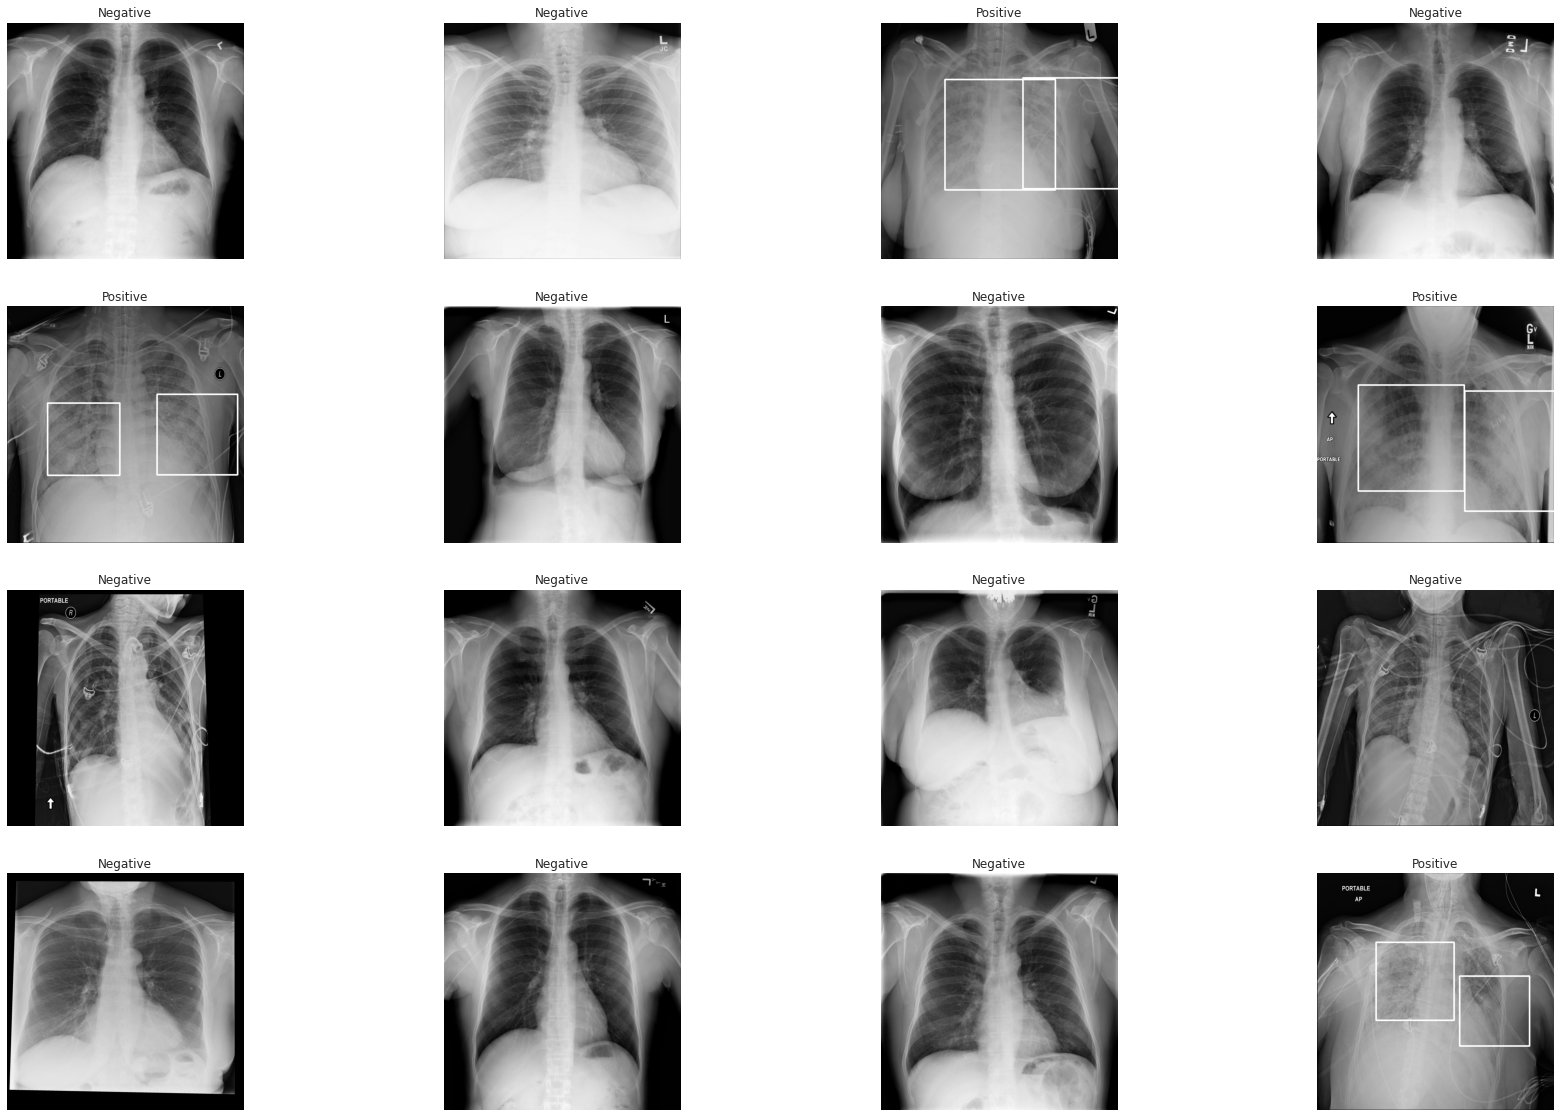

In [ ]:
# plt.figure(figsize=(30,20))
# for j,img in enumerate(os.listdir('/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_images')):
#     path=os.path.join('/content/drive/MyDrive/Colab Notebooks/Extracted_data/stage_2_train_images',img)
#     tar=df[df['path']==path]['Target'].values[0]
#     img=dcm.read_file(path).pixel_array
#     plt.subplot(4,4,j+1)
#     plt.axis('off')
#     if tar==0:
#         plt.title('Negative')
#     else:
#         plt.title('Positive')
        
#         s=df[df['path']==path]
        
#         for _,row in s.iterrows():
#             x=int(row['x'])
#             y=int(row['y'])
#             w=int(row['width'])
#             h=int(row['height'])
#             cv2.rectangle(img,(x,y),(x+h,y+h),(255,255,0),5)
#     plt.imshow(img,cmap='gray')
#     if(j==15):
#         break

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen=ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True,horizontal_flip=True,
                          width_shift_range=0.05,rescale=1/255,fill_mode='nearest',height_shift_range=0.05,
                           preprocessing_function=preprocess_input,validation_split=0.3,
                          )

In [ ]:
train=datagen.flow_from_directory('data',color_mode='rgb',batch_size=128,class_mode='binary',subset='training')
test=datagen.flow_from_directory('data',color_mode='rgb',batch_size=32,class_mode='binary',subset='validation')

Found 4112 images belonging to 2 classes.
Found 1760 images belonging to 2 classes.


In [ ]:
train.class_indices

{'negative': 0, 'positive': 1}

In [ ]:
pre_trained_model = VGG16(input_shape = (256,256,3), 
                                include_top = False, 
                                weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

58900480/58889256 [==============================] - 1s 0us/step
last layer output shape:  (None, 8, 8, 512)


In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,LeakyReLU,GaussianDropout

model = Flatten()(last_output)
model = Dense(1024)(model)
model=LeakyReLU(0.1)(model)
model=Dropout(0.25)(model)
model=BatchNormalization()(model)
model = Dense(1024)(model)
model=LeakyReLU(0.1)(model)
model=Dropout(0.25)(model)
model=BatchNormalization()(model)
model = Dense(1, activation='sigmoid')(model)

In [ ]:
from tensorflow.keras.models import Model


fmodel = Model( pre_trained_model.input, model) 

fmodel.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
fmodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


early=EarlyStopping(monitor='accuracy',patience=3,mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1,cooldown=0, mode='auto',min_delta=0.0001, min_lr=1e-5)

In [ ]:
class_weight={0:1,1:3.3}

In [ ]:
fmodel.fit(train,epochs=5,callbacks=[reduce_lr],steps_per_epoch=20,validation_data=test.samples//test.batch_size,class_weight=class_weight)

Epoch 1/5
20/20 [==============================] - 372s 19s/step - loss: 1.0036 - accuracy: 0.7349 - val_loss: 0.7955 - val_accuracy: 0.6847
Epoch 2/5
20/20 [==============================] - 87s 4s/step - loss: 0.9279 - accuracy: 0.7230 - val_loss: 0.7076 - val_accuracy: 0.7006
Epoch 3/5
20/20 [==============================] - 86s 4s/step - loss: 0.8387 - accuracy: 0.7430 - val_loss: 0.5670 - val_accuracy: 0.7284
Epoch 4/5
20/20 [==============================] - 86s 4s/step - loss: 0.7398 - accuracy: 0.7610 - val_loss: 0.4707 - val_accuracy: 0.7937
Epoch 5/5
20/20 [==============================] - 85s 4s/step - loss: 0.7461 - accuracy: 0.7659 - val_loss: 0.5376 - val_accuracy: 0.7665


In [ ]:
fmodel.save('/content/drive/MyDrive/Colab Notebooks/Extracted_data/working/model_vgg16.h5')

<Figure size 2160x1440 with 0 Axes>

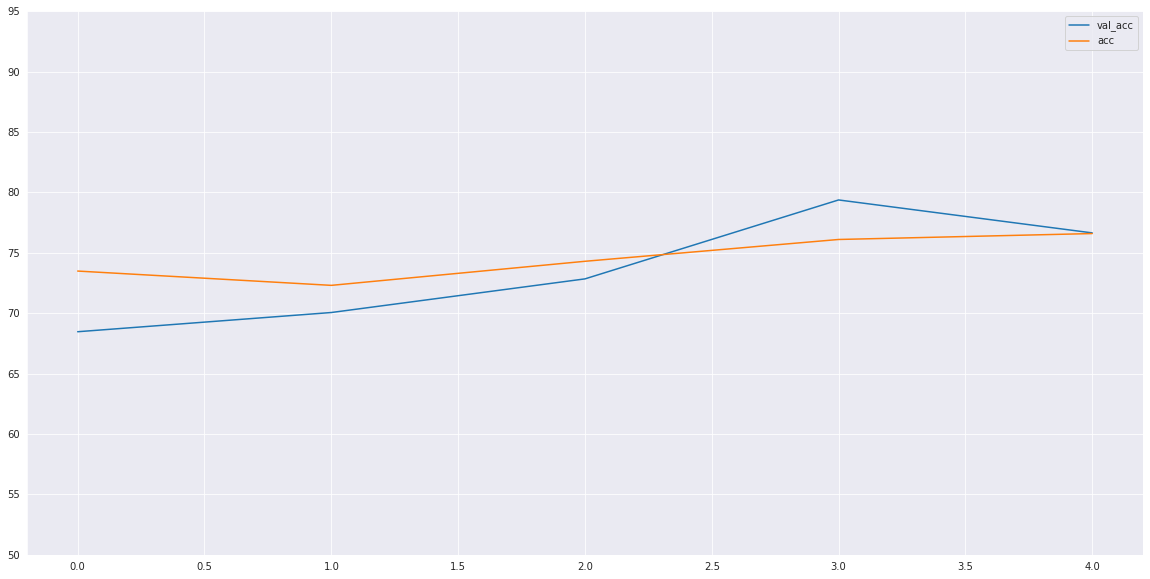

In [ ]:
# Plot Accuracy
plt.figure(figsize=(30,20))
val_acc=np.asarray(fmodel.history.history['val_accuracy'])*100
acc=np.asarray(fmodel.history.history['accuracy'])*100
acc=pd.DataFrame({'val_acc':val_acc,'acc':acc})
acc.plot(figsize=(20,10),yticks=range(50,100,5))

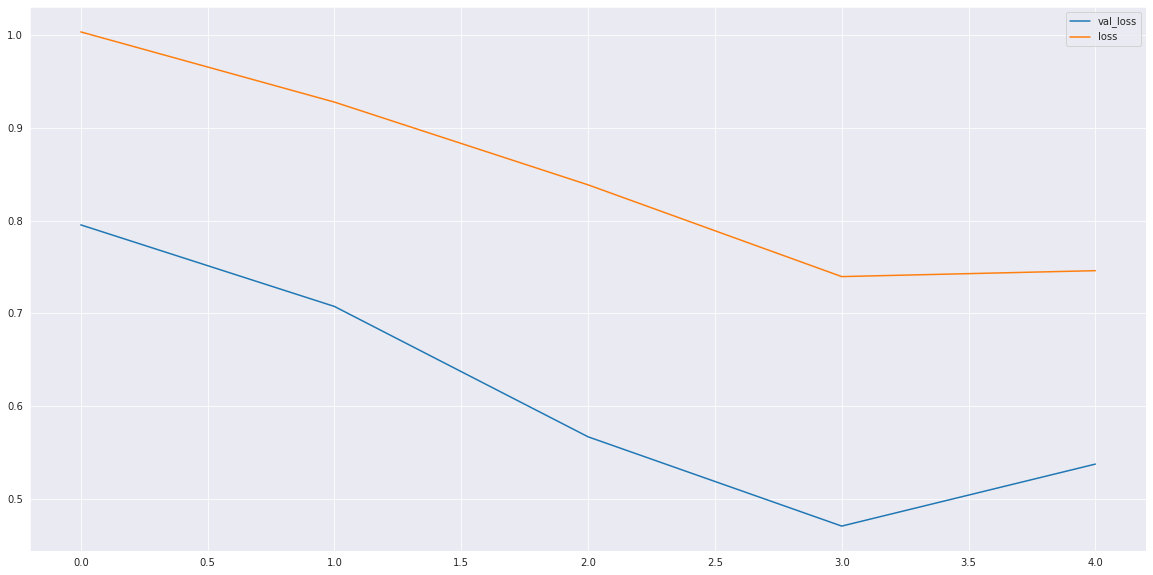

In [ ]:
# Plot loss
loss=fmodel.history.history['loss']
val_loss=fmodel.history.history['val_loss']
loss=pd.DataFrame({'val_loss':val_loss,'loss':loss})
loss.plot(figsize=(20,10))

In [ ]:
y=[]

test.reset()

for i in tqdm(range(54)):
    _,tar=test.__getitem__(i)
    for j in tar:
        y.append(j)

100%|██████████| 54/54 [00:27<00:00,  2.00it/s]


In [ ]:
test.reset()
y_pred=fmodel.predict(test)

In [ ]:
pred=[]
for i in y_pred:
    if i[0]>=0.5:
        pred.append(1)
    else:
        pred.append(0)

In [ ]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,classification_report

In [ ]:
# Classification Report
# print(classification_report(y,pred))  --> error for Found input variables with inconsistent numbers of samples: [2688, 8004]
print(classification_report(y,pred[:len(y)]))

              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85      1218
         1.0       0.76      0.30      0.43       510

    accuracy                           0.76      1728
   macro avg       0.76      0.63      0.64      1728
weighted avg       0.76      0.76      0.73      1728



The area under the curve is: 0.8302102450175473


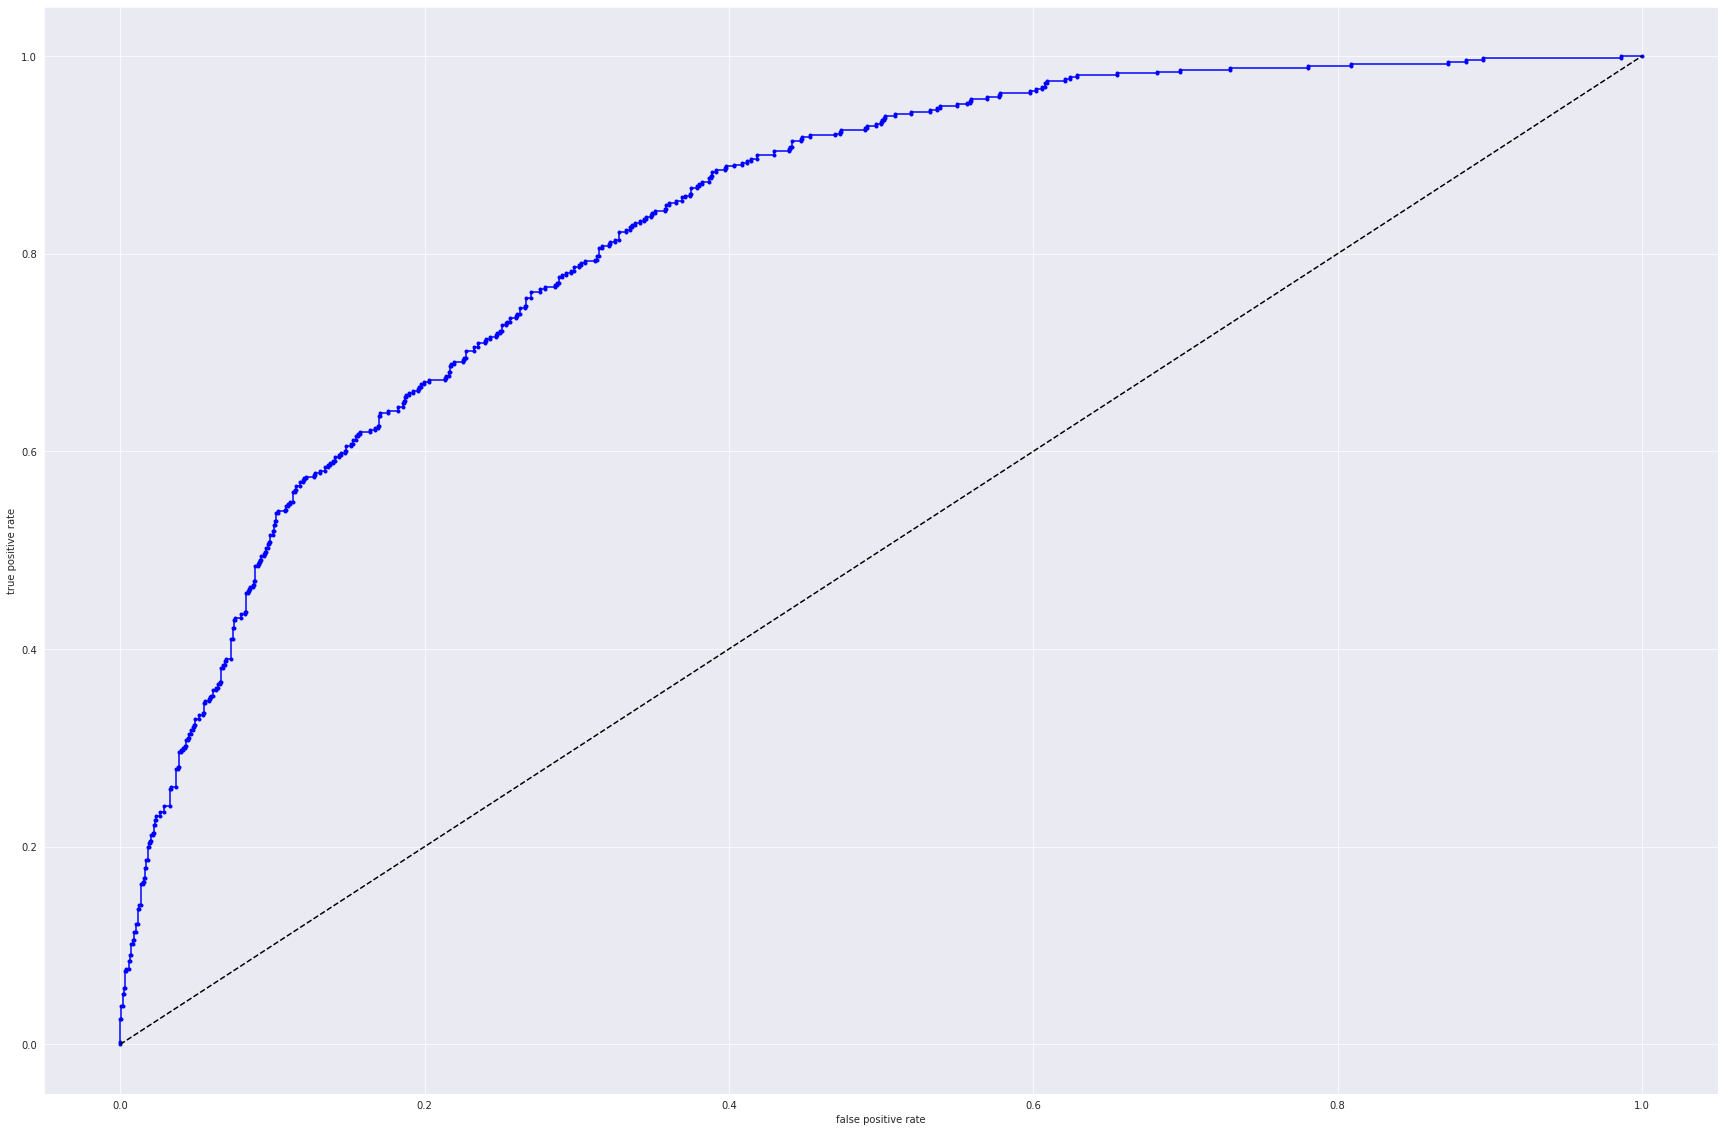

In [ ]:
plt.figure(figsize=(30,20))
fpr,tpr,_=roc_curve(y,y_pred[:len(y)])
area_under_curve=auc(fpr,tpr)
print('The area under the curve is:',area_under_curve)
# Plot area under curve
plt.plot(fpr,tpr,'b.-')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr,fpr,linestyle='--',color='black')